## *Project Name - CAR RESALE VALUE PREDICTION*

## *Team ID - PNT2022TMID32311*

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

## Read the Dataset

In [2]:
df=pd.read_csv('autos.csv')

## Data Preprocessing

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 0:00:00,0,70435,2016-04-07 3:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 0:00:00,0,66954,2016-04-07 1:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 0:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 0:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 0:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 0:00:00,0,39576,2016-04-06 0:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 0:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 0:00:00,0,87439,2016-04-07 7:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 0:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 0:00:00,0,73326,2016-03-22 3:17:10


In [5]:
df.shape

(371528, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [7]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
#Drop the irrelevant columns

df=df.drop(columns=['dateCrawled','dateCreated','lastSeen','name','abtest','nrOfPictures','postalCode'],axis=1)

In [9]:
df.head()

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,privat,Angebot,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,privat,Angebot,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,privat,Angebot,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,privat,Angebot,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [10]:
df.seller.unique() 

array(['privat', 'gewerblich'], dtype=object)

In [11]:
df.seller.value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [12]:
# Since gewerblich has only 3, so drop it

df=df.drop(columns=['seller'],axis=1)

In [13]:
df.offerType.unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [14]:
df.offerType.value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [15]:
# OfferType has only 12 Gesuch values, so drop it

df=df.drop(columns=['offerType'],axis=1)

In [16]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [17]:
#Cars having power less than 50ps and greater than 900ps seems a little suspicious

df=df[(df.powerPS>50) & (df.powerPS<900)]

In [18]:
df.shape #around 50000 data are removed

(319709, 11)

In [19]:
df.yearOfRegistration.unique()

array([2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 2016, 2007, 2009,
       2002, 2018, 1990, 2017, 2003, 1991, 1984, 2006, 1999, 2012, 1994,
       2010, 2000, 1992, 1997, 2013, 1996, 1989, 2015, 1968, 1993, 1985,
       1983, 1959, 1981, 1969, 1971, 1987, 1973, 1988, 1967, 1980, 1986,
       1965, 1974, 1979, 1982, 1978, 1976, 1972, 1977, 1961, 1964, 1975,
       1966, 1970, 1937, 1963, 1954, 1955, 1941, 1962, 1500, 1960, 1951,
       1910, 1949, 1953, 2019, 1957, 1958, 2900, 6000, 1956, 1933, 5911,
       4000, 1950, 1948, 8000, 1931, 5000, 1000, 1942, 1936, 1935, 3000,
       6500, 9000, 9999, 1952, 1930, 1943, 1945, 1800, 1947, 1939, 2800,
       1934, 4500, 8200, 3500], dtype=int64)

In [20]:
#Let's filter yearOfRegistration range between 1950 and 2017

df=df[(df.yearOfRegistration >=1950) & (df.yearOfRegistration <2017)]

In [21]:
df.shape #around 50000 records were removed

(309171, 11)

In [22]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja


In [23]:
df.gearbox.unique()

array(['manuell', 'automatik', nan], dtype=object)

In [24]:
df.fuelType.unique()

array(['diesel', 'benzin', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [25]:
df.brand.unique()

array(['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'honda', 'fiat',
       'opel', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo',
       'subaru', 'volvo', 'mitsubishi', 'kia', 'seat', 'lancia',
       'porsche', 'citroen', 'toyota', 'chevrolet', 'dacia', 'suzuki',
       'daihatsu', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover',
       'land_rover', 'lada', 'trabant'], dtype=object)

In [26]:
df.vehicleType.unique()

array(['coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', nan, 'andere'], dtype=object)

In [27]:
df.notRepairedDamage.unique()

array(['ja', nan, 'nein'], dtype=object)

In [28]:
# The dataset contains many german words. 
# So, replace it with english words

df.gearbox.replace(('manuell','automatik'),('manual','automatic'),inplace=True)
df.fuelType.replace(('benzin','andere','elektro'),('petrol','others','electric'),inplace=True)
df.vehicleType.replace(('kleinwagen','cabrio','kombi','andere'),('small car','convertible','combination','others'),inplace=True)
df.notRepairedDamage.replace(('ja','nein'),('yes','no'),inplace=True)

In [29]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes
2,9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN
3,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,no
5,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes


In [30]:
# Drop Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [31]:
df.shape #Again 24001 were removed

(285170, 11)

In [32]:
# Combine monthOfRegistration and yearOfRegistration
df['monthOfRegistration']/=12

In [33]:
df['Age']=(2017-df['yearOfRegistration'])+df['monthOfRegistration']
df['Age']=round(df['Age'],2)

In [34]:
df['Age'].describe()

count    285170.000000
mean         14.212724
std           6.649216
min           1.000000
25%           9.670000
50%          14.000000
75%          18.250000
max          67.420000
Name: Age, dtype: float64

In [35]:
df=df.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

In [36]:
df.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,18300,coupe,manual,190,NaN,125000,diesel,audi,yes,6.42
2,9800,suv,automatic,163,grand,125000,diesel,jeep,NaN,13.67
3,1500,small car,manual,75,golf,150000,petrol,volkswagen,no,16.50
4,3600,small car,manual,69,fabia,90000,diesel,skoda,no,9.58
5,650,limousine,manual,102,3er,150000,petrol,bmw,yes,22.83


In [37]:
# Checking for Missing Values

df.isnull().any()

price                False
vehicleType           True
gearbox               True
powerPS              False
model                 True
kilometer            False
fuelType              True
brand                False
notRepairedDamage     True
Age                  False
dtype: bool

In [38]:
df.isnull().sum()

price                    0
vehicleType          11059
gearbox               5116
powerPS                  0
model                11347
kilometer                0
fuelType             15484
brand                    0
notRepairedDamage    41190
Age                      0
dtype: int64

In [39]:
df.mode()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,0,limousine,manual,75,golf,150000,petrol,volkswagen,no,17.0


In [40]:
df = df.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [41]:
df.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

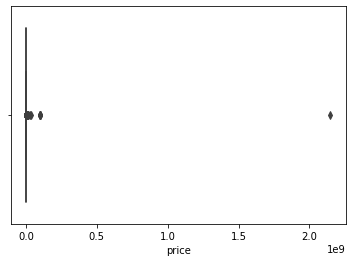

In [42]:
#checking outliers

sns.boxplot(df.price)

In [43]:
#removing outliers

df=df[(df.price >=100) & (df.price <= 150000)]

In [44]:
#Save the dataframe for future purpose

df.to_csv('autos_preprocessed.csv')

## Data Visualization

## Uni-variate Analysis

<AxesSubplot:>

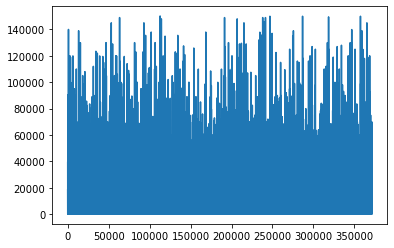

In [45]:
df.price.plot()

C:\Users\God\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

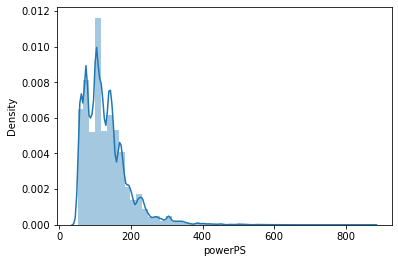

In [46]:
sns.distplot(df.powerPS)

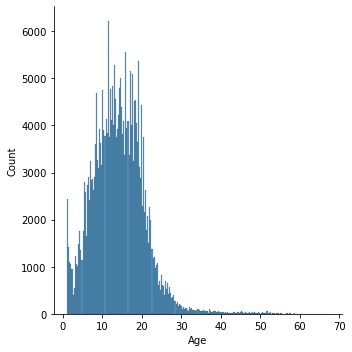

In [47]:
sns.displot(df.Age)

### Bi-variate Analysis

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='price'>

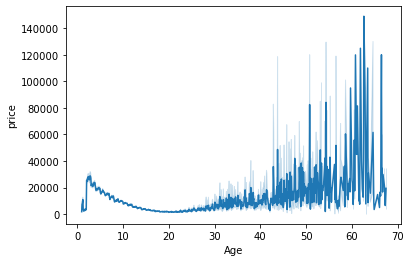

In [48]:
sns.lineplot(df.Age,df.price)

C:\Users\God\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='vehicleType'>

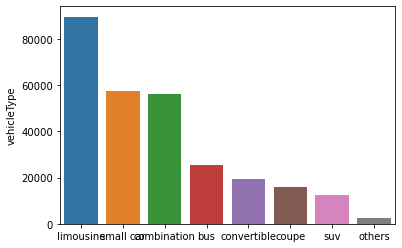

In [49]:
sns.barplot(df.vehicleType.value_counts().index,df.vehicleType.value_counts())

## Multi-variate Analysis

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'powerPS'}>],
       [<AxesSubplot:title={'center':'kilometer'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

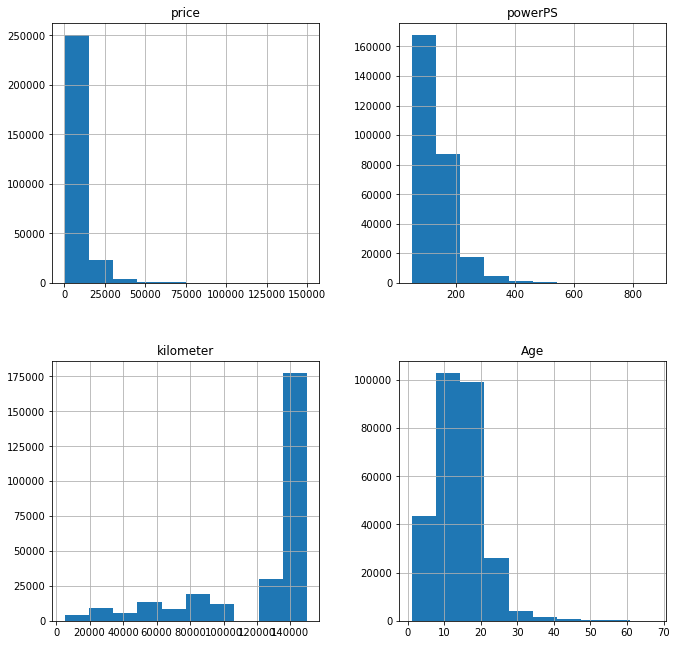

In [50]:
df.hist(figsize=(11,11))

## Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
df.vehicleType=le.fit_transform(df.vehicleType)
df.gearbox=le.fit_transform(df.gearbox)
df.model=le.fit_transform(df.model)
df.fuelType=le.fit_transform(df.fuelType)
df.brand=le.fit_transform(df.brand)
df.notRepairedDamage=le.fit_transform(df.notRepairedDamage)

In [53]:
df.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,18300,3,1,190,117,125000,1,1,1,6.42
2,9800,7,0,163,118,125000,1,14,0,13.67
3,1500,6,1,75,117,150000,6,38,0,16.50
4,3600,6,1,69,102,90000,1,31,0,9.58
5,650,4,1,102,11,150000,6,2,1,22.83


## Descriptive statistics

In [54]:
df.describe() 

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
count,278596.000000,278596.000000,278596.000000,278596.000000,278596.000000,278596.000000,278596.000000,278596.000000,278596.000000,278596.000000
mean,6421.265115,3.386093,0.773877,129.262900,99.226977,125330.909274,4.386818,20.154155,0.093953,14.134623
std,8353.491905,2.114111,0.418321,61.747317,70.567973,39353.620155,2.317911,13.416614,0.291764,6.605514
min,100.000000,0.000000,0.000000,51.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000
25%,1500.000000,1.000000,1.000000,86.000000,39.000000,100000.000000,1.000000,9.000000,0.000000,9.580000
50%,3600.000000,4.000000,1.000000,116.000000,96.000000,150000.000000,6.000000,21.000000,0.000000,13.920000
75%,8200.000000,6.000000,1.000000,150.000000,152.000000,150000.000000,6.000000,32.000000,0.000000,18.250000
max,150000.000000,7.000000,1.000000,871.000000,248.000000,150000.000000,6.000000,39.000000,1.000000,67.420000


## Correlation Analysis

In [55]:
df.corr()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
price,1.000000,-0.068198,-0.304980,0.581262,-0.005460,-0.446371,-0.210020,-0.095136,-0.153183,-0.387628
vehicleType,-0.068198,1.000000,0.048440,-0.202739,0.005420,-0.132145,0.261147,0.041278,0.000221,0.010659
gearbox,-0.304980,0.048440,1.000000,-0.459160,0.041348,0.039731,0.153884,0.120978,0.031373,0.082754
powerPS,0.581262,-0.202739,-0.459160,1.000000,-0.124214,-0.027280,-0.150298,-0.285262,-0.060114,-0.150745
model,-0.005460,0.005420,0.041348,-0.124214,1.000000,-0.030607,-0.050555,0.470038,-0.001002,-0.059387
kilometer,-0.446371,-0.132145,0.039731,-0.027280,-0.030607,1.000000,-0.105542,-0.029504,0.092790,0.369770
fuelType,-0.210020,0.261147,0.153884,-0.150298,-0.050555,-0.105542,1.000000,0.034812,0.036246,0.269938
brand,-0.095136,0.041278,0.120978,-0.285262,0.470038,-0.029504,0.034812,1.000000,-0.003031,0.024910
notRepairedDamage,-0.153183,0.000221,0.031373,-0.060114,-0.001002,0.092790,0.036246,-0.003031,1.000000,0.098267
Age,-0.387628,0.010659,0.082754,-0.150745,-0.059387,0.369770,0.269938,0.024910,0.098267,1.000000


<AxesSubplot:>

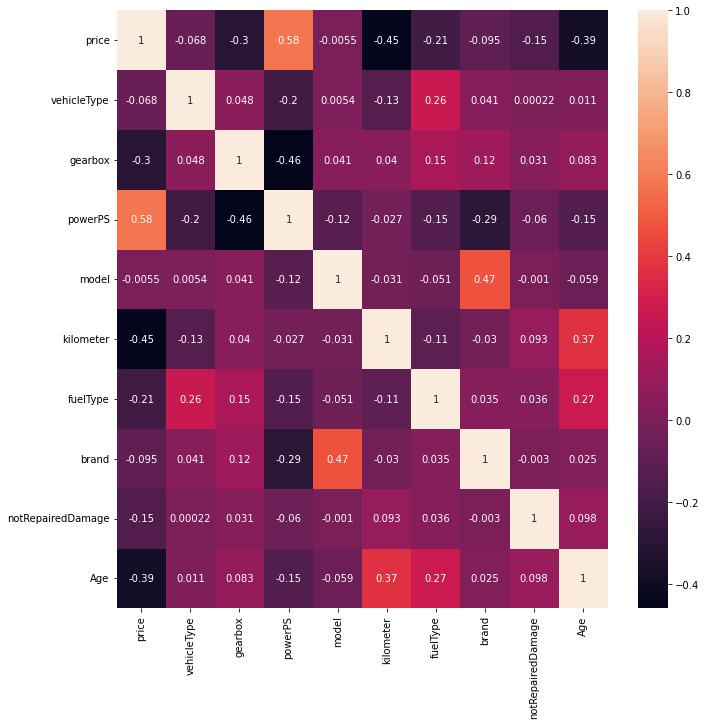

In [56]:
#To visualize correlation

plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True)

## Split the data into Independent and Dependent Variables

In [57]:
X=df.drop(columns=['price'])
X.head()

,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,3,1,190,117,125000,1,1,1,6.42
2,7,0,163,118,125000,1,14,0,13.67
3,6,1,75,117,150000,6,38,0,16.50
4,6,1,69,102,90000,1,31,0,9.58
5,4,1,102,11,150000,6,2,1,22.83


In [58]:
y=df.price
y.head()

1    18300
2     9800
3     1500
4     3600
5      650
Name: price, dtype: int64

## Scaling the Independent Variable

In [59]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [60]:
X_scaled=pd.DataFrame(scalar.fit_transform(X),columns=X.columns)
X_scaled.head()

,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,0.428571,1.0,0.169512,0.471774,0.827586,0.166667,0.025641,1.0,0.081602
1,1.000000,0.0,0.136585,0.475806,0.827586,0.166667,0.358974,0.0,0.190756
2,0.857143,1.0,0.029268,0.471774,1.000000,1.000000,0.974359,0.0,0.233363
3,0.857143,1.0,0.021951,0.411290,0.586207,0.166667,0.794872,0.0,0.129178
4,0.571429,1.0,0.062195,0.044355,1.000000,1.000000,0.051282,1.0,0.328666


## Split the train data and test data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=3)

In [63]:
x_train.shape

(195017, 9)

In [64]:
x_test.shape

(83579, 9)

## Model Building

## *1.Random Forest*

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf=RandomForestRegressor(n_estimators=1000,max_depth=10,random_state=35)

In [67]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=35)

In [68]:
pred_rf = rf.predict(x_test)

In [69]:
pred_rf1= rf.predict(x_train)

## *2.Linear Regression*

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr=LinearRegression(fit_intercept=True)

In [72]:
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
pred_lr= lr.predict(x_test)

In [74]:
pred_lr1= lr.predict(x_train)

## Evaluation Metrics

In [75]:
from sklearn import metrics

In [76]:
# MSE of Random Forest Regression and Linear Regression
print(metrics.mean_squared_error(y_test,pred_rf))
print(metrics.mean_squared_error(y_test,pred_lr))

11683542.319213457
30399493.009061515


In [77]:
# RMSE of Random Forest Regression and Linear Regression
print(np.sqrt(metrics.mean_squared_error(y_test,pred_rf)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))

3418.119705220029
5513.5735244087855


In [78]:
print(metrics.r2_score(y_test,pred_rf)) # R2-Score of Random Forest Regression
print(metrics.r2_score(y_test,pred_lr)) # R2-Score of Linear Regression

0.8366888465116236
0.5750795321203674


In [79]:
# R2-score on Training data

print(metrics.r2_score(y_train,pred_rf1))
print(metrics.r2_score(y_train,pred_lr1))

0.8825879474901416
0.5717665905448308


### <font color="red">*It is found that the Random Forest Regression model perfoms better than Linear Regression model with the r2-score of 0.8366888465116236*</font>

### <font color="blue"> *Training Accuracy - 0.8825879474901416  Testing Accuracy - 0.8366888465116236* </font>

## Save the model

In [80]:
import pickle

In [81]:
filename="resale_model.sav"

In [82]:
pickle.dump(rf,open(filename,'wb'))